# Imports and installs (if needed)

In [2]:

!pip install geopandas matplotlib pandas numpy scikit-learn scipy
!pip install alphashape descartes
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.interpolate import splprep, splev
from scipy.spatial import cKDTree
from sklearn.metrics import mean_squared_error


#  Load and extract Iran border points


In [3]:
world = gpd.read_file("https://ZohrehKeykhaee2025.github.io/Nonparametric-Regression-IranMap/ne_50m_admin_0_countries")

iran = world[world['NAME'] == 'Iran']

iran_boundary = iran.boundary

all_x = []
all_y = []

for geometry in iran_boundary.geometry:
    if geometry.geom_type == 'MultiLineString':
        for line in geometry.geoms:
            xs, ys = line.xy
            all_x.extend(xs)
            all_y.extend(ys)
    elif geometry.geom_type == 'LineString':
        xs, ys = geometry.xy
        all_x.extend(xs)
        all_y.extend(ys)

df = pd.DataFrame({'x': all_x, 'y': all_y})
df.to_csv("iran_border_points.csv", index=False)
print("✅ Iran border points saved to 'iran_border_points.csv'")

plt.figure(figsize=(8, 10))
plt.scatter(df['x'], df['y'], s=0.5, color='black')
plt.title("Iran Border Points")
plt.axis('equal')
plt.show()


HTTPError: HTTP Error 404: Not Found

# Kernel Density Estimation (KDE) for Border Points

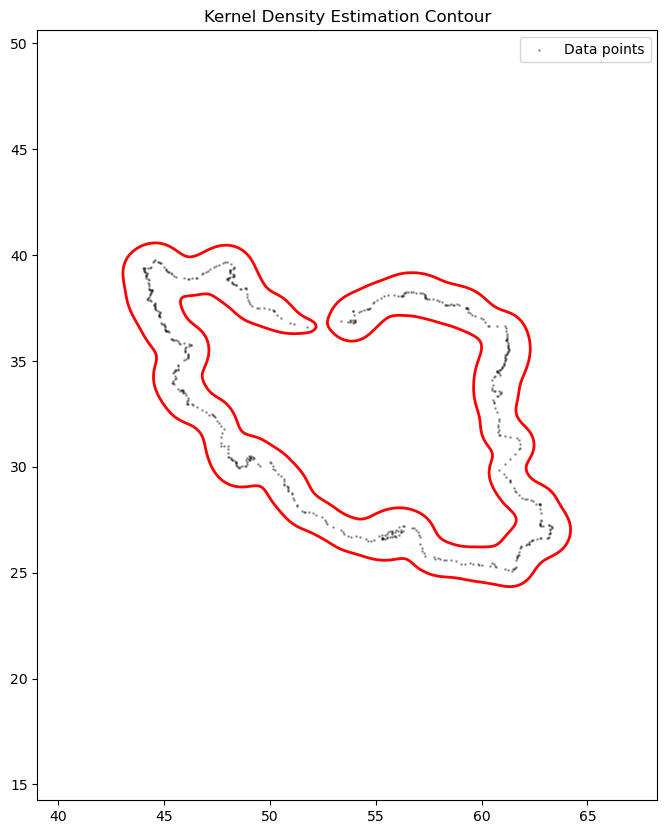

In [6]:

df = pd.read_csv("iran_border_points.csv")
X = df[['x', 'y']].values


bandwidth = 0.5  
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(X)


x_min, y_min = X.min(axis=0) - 5
x_max, y_max = X.max(axis=0) + 5

x_grid, y_grid = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)
grid_samples = np.vstack([x_grid.ravel(), y_grid.ravel()]).T


log_density = kde.score_samples(grid_samples)
density = np.exp(log_density).reshape(x_grid.shape)


threshold = np.percentile(density, 85)
levels = [threshold, density.max()]

plt.figure(figsize=(8, 10))
plt.scatter(X[:,0], X[:,1], s=1, color='black', alpha=0.3, label='Data points')
contour = plt.contour(x_grid, y_grid, density, levels=levels, colors=['red'], linewidths=2)
plt.title('Kernel Density Estimation Contour')
plt.axis('equal')
plt.legend()
plt.show()


# Smooth Spline Representation of Iran Boundary

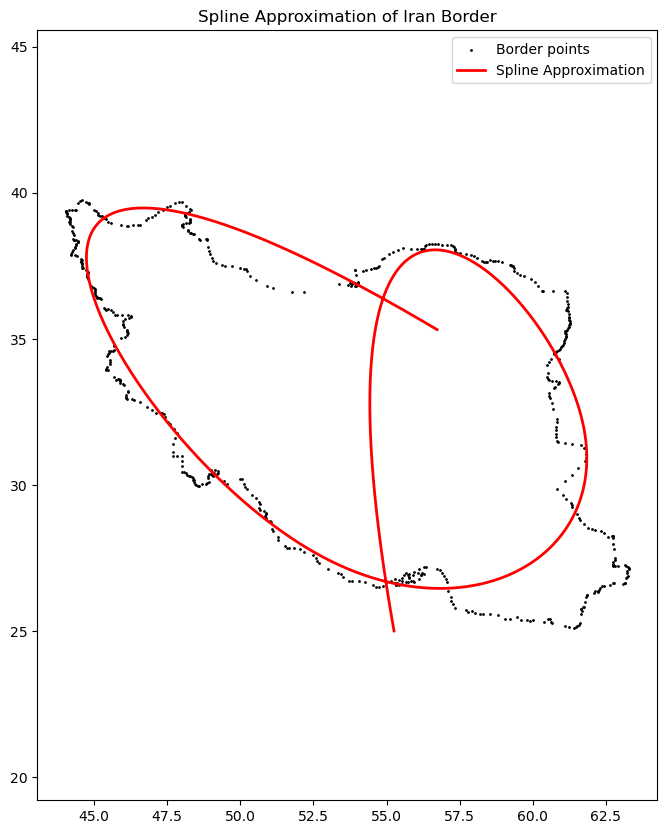

In [9]:

df = pd.read_csv("iran_border_points.csv")


x = df['x'].values
y = df['y'].values


tck, u = splprep([x, y], s=1000)  
unew = np.linspace(0, 1.0, 1000)
out = splev(unew, tck)


plt.figure(figsize=(8, 10))
plt.scatter(x, y, s=1, color='black', label='Border points')
plt.plot(out[0], out[1], 'r-', label='Spline Approximation', linewidth=2)
plt.axis('equal')
plt.title("Spline Approximation of Iran Border")
plt.legend()
plt.show()


In [ ]:
from scipy.spatial.distance import cdist
import numpy as np


dist_to_spline = cdist(X, spline_points)
min_dist_spline = np.min(dist_to_spline, axis=1)
mean_dist_spline = np.mean(min_dist_spline)
max_dist_spline = np.max(min_dist_spline)


dist_to_kde = cdist(X, kde_points)
min_dist_kde = np.min(dist_to_kde, axis=1)
mean_dist_kde = np.mean(min_dist_kde)
max_dist_kde = np.max(min_dist_kde)

print("Spline approximation mean distance:", mean_dist_spline)
print("Spline approximation max distance:", max_dist_spline)
print("KDE approximation mean distance:", mean_dist_kde)
print("KDE approximation max distance:", max_dist_kde)


Spline approximation mean distance: 0.6505347499524956
Spline approximation max distance: 2.7267586587708608
KDE approximation mean distance: 0.9374992253918456
KDE approximation max distance: 1.2654673597852604
